In [1]:
import pandas as pd
import glob
import json

In [2]:
files=[i for i in glob.glob('youtube-new/*.{}'.format('csv'))]
sorted(files)

['youtube-new/CAvideos.csv',
 'youtube-new/DEvideos.csv',
 'youtube-new/FRvideos.csv',
 'youtube-new/GBvideos.csv',
 'youtube-new/USvideos.csv']

In [3]:
dfs=list()
for csv in files:
    df=pd.read_csv(csv,index_col='video_id')
    df['country']=csv[9:11]
    dfs.append(df)

my_df=pd.concat(dfs)
my_df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539.0,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,ew
Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278.0,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,ew
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",ew


In [4]:
# date time regar 
my_df['trending_date']=pd.to_datetime(my_df['trending_date'],errors='coerce',format='%y.%d.%m')
my_df['publish_time']=pd.to_datetime(my_df['publish_time'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%fZ')
my_df=my_df[my_df['trending_date'].notnull()]
my_df=my_df[my_df['publish_time'].notnull()]
my_df=my_df.dropna(how='any',inplace=False, axis=0)

# split date and time
my_df.insert(4,'publish_date',my_df['publish_time'].dt.date)
my_df['publish_time']=my_df['publish_time'].dt.time

my_df_full=my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df=my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')

my_df[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
IVRVXYCrr14,2017-11-05,18:00:01
1eS_17CG9sk,2017-11-05,12:03:04
NWdc7PyZNLA,2017-11-03,09:00:01
CCPX4EYrskw,2017-11-06,09:00:02
hIwRdDcQBEU,2017-11-06,16:33:36


Insert Category Column

In [5]:
my_df['category_id']=my_df['category_id'].astype(str)
my_df_full['category_id']=my_df['category_id'].astype(str)

category_id={}
# using the json file to load the category
with open('youtube-new/US_category_id.json','r') as f:
    data=json.load(f)
    for category in data['items']:
        category_id[category['id']]=category['snippet']['title']

my_df.insert(4,'category',my_df['category_id'].map(category_id))
my_df_full.insert(4,'category',my_df_full['category_id'].map(category_id))
category_list=my_df['category'].unique()
category_list

array(['People & Blogs', 'Comedy', 'Entertainment', 'Howto & Style',
       'Music', 'Film & Animation', 'Sports', 'News & Politics', 'Gaming',
       'Travel & Events', 'Autos & Vehicles', 'Science & Technology',
       'Education', 'Pets & Animals', 'Shows', 'Nonprofits & Activism'],
      dtype=object)

How long usually a video can trend in different countries?

anaylisis of different perferences for different countries?

sentiment analysis of "comment" on Video's tags

In [10]:
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
en_stopwords=list(stopwords.words('english'))
de_stopwords=list(stopwords.words('german'))
fr_stopwords=list(stopwords.words('french'))
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)
MAX_N=1000

Text(0.5,1,'Polarity of Categories in Youtube videos')

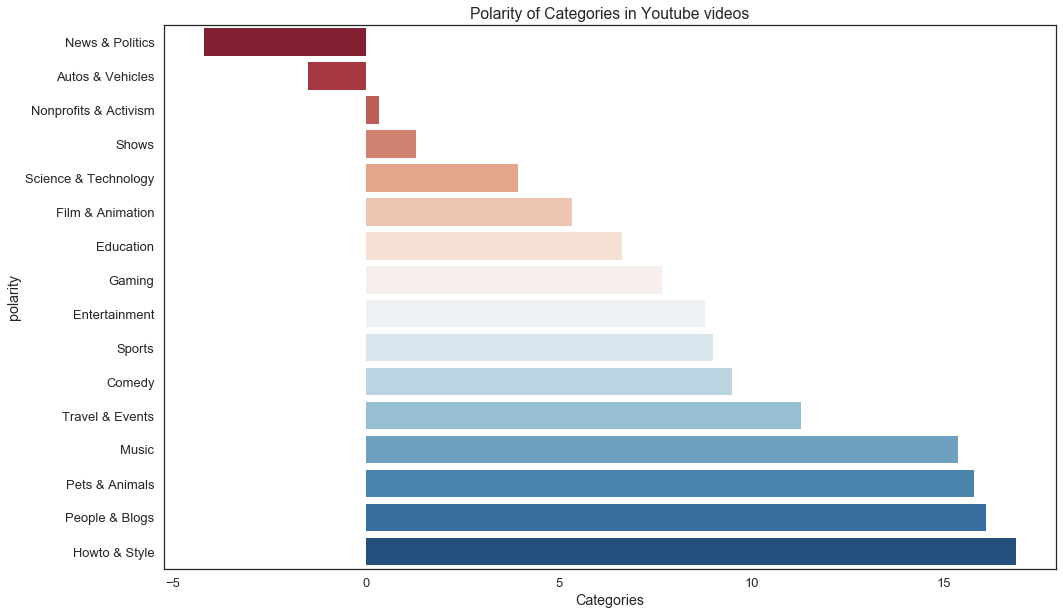

In [8]:
polarities = list()

for cate in category_list:
    tags_word = my_df[my_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

In [11]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

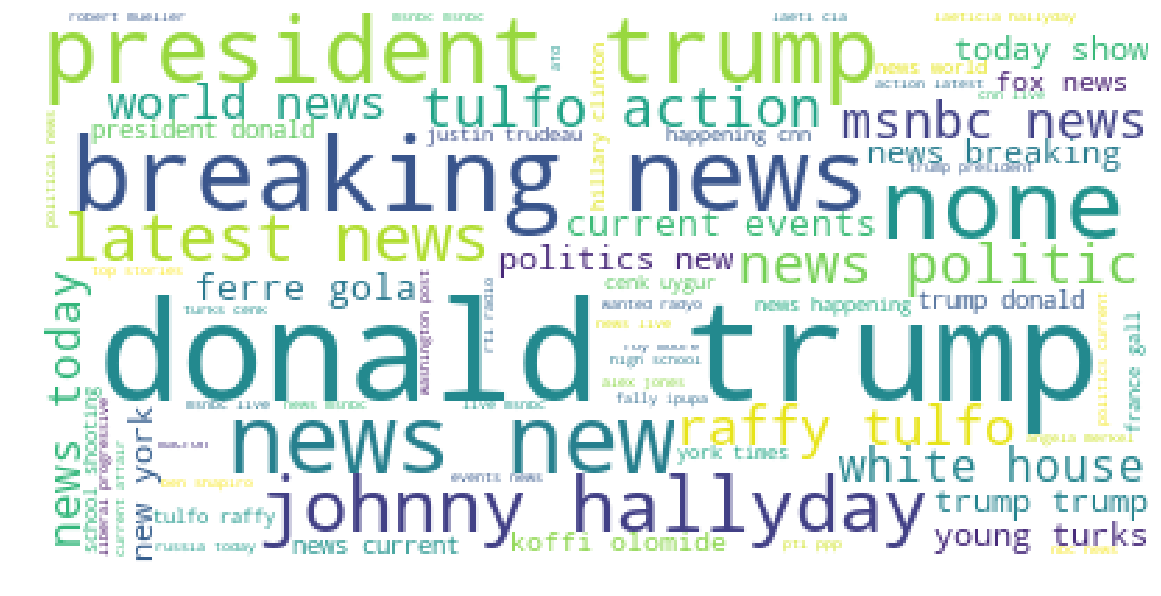

In [19]:
# negative "news & politics"
tags_word = my_df[my_df['category']=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

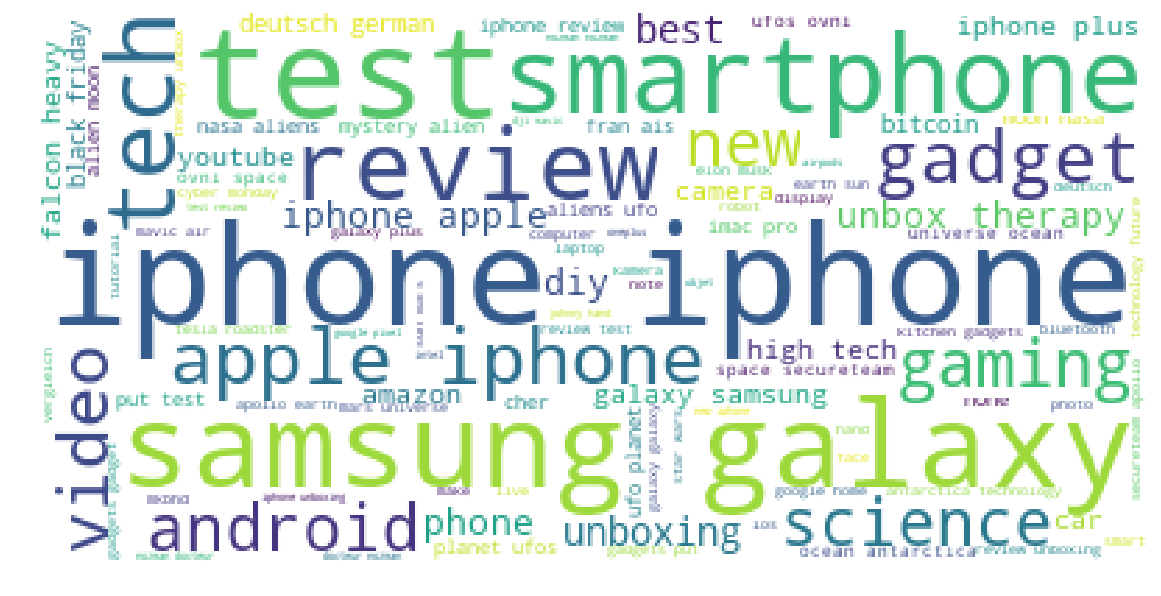

In [24]:
# positive Science & Technology
tags_word=my_df[my_df['category']=='Science & Technology']['tags'].str.lower().str.cat(sep=' ')
tags_word=re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')